# Multi Layer Perceptron Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [1]:
import pandas as pd

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
2,2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,5.999987,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,5.0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [3]:
print(data.shape)
data = data.dropna() 
print(data.shape)

(3359, 148)
(3220, 148)


In [4]:
data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

In [5]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:320] 
train = shuffled[320:]

test_y = test['Q16']
train_y = train['Q16']

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=10000).fit(train_X, train_y)

In [7]:
print(clf.predict_proba(test_X[:3]))
print(test_y[:3])

[[8.86619336e-01 5.48102809e-07 9.60274040e-03 2.36238735e-04
  7.58899715e-03 2.05752908e-06 3.93860150e-04 7.98488562e-02
  1.56668354e-02 4.05298895e-05]
 [6.37264077e-01 2.28397157e-04 7.03671368e-02 7.21889869e-06
  1.11837816e-01 1.03577443e-05 2.72408944e-03 5.22577040e-03
  1.72335136e-01 3.19371518e-11]
 [9.97440646e-01 1.15616397e-05 2.07494444e-04 1.69476210e-04
  3.31387211e-06 4.65759761e-05 2.79182293e-06 8.50920342e-06
  1.25066388e-07 2.10950534e-03]]
2459    1.0
122     8.0
1604    1.0
Name: Q16, dtype: float64


In [8]:
clf.score(test_X, test_y)

0.296875

### Well that didnt really work. Time to make my own ANN

Using this tutorial: 
https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-multi-class-classification-e940f74bd899

In [9]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [10]:
test_y.head()

2459    1.0
122     8.0
1604    1.0
1944    3.0
3095    2.0
Name: Q16, dtype: float64

In [11]:
dummy_y_test = pd.get_dummies(data=test_y, prefix='parti')
print(dummy_y_test)

      parti_1.0  parti_2.0  parti_3.0  parti_4.0  parti_5.0  parti_6.0  \
2459          1          0          0          0          0          0   
122           0          0          0          0          0          0   
1604          1          0          0          0          0          0   
1944          0          0          1          0          0          0   
3095          0          1          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
647           0          0          0          0          0          0   
492           0          0          0          0          0          0   
2638          0          0          0          0          0          1   
1748          0          0          0          0          0          0   
1515          0          0          1          0          0          0   

      parti_7.0  parti_8.0  parti_9.0  parti_10.0  
2459          0          0          0           0  
122    

In [12]:
dummy_y_train = pd.get_dummies(data=train_y, prefix='parti')
print(dummy_y_train)

      parti_1.0  parti_2.0  parti_3.0  parti_4.0  parti_5.0  parti_6.0  \
1921          0          0          0          0          1          0   
1099          0          0          0          1          0          0   
2832          0          0          0          0          0          0   
1606          0          0          0          0          0          0   
1860          0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1978          1          0          0          0          0          0   
1400          0          0          1          0          0          0   
771           1          0          0          0          0          0   
2524          0          0          0          0          0          0   
3032          0          0          1          0          0          0   

      parti_7.0  parti_8.0  parti_9.0  parti_10.0  
1921          0          0          0           0  
1099   

In [13]:
# build a model
model = Sequential()
model.add(Input(shape=(train_X.shape[1],))) # input shape is (features,)
model.add(Dense(train_X.shape[1], activation='relu'))
model.add(Dense(train_X.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 147)               21756     
_________________________________________________________________
dense_1 (Dense)              (None, 147)               21756     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1480      
Total params: 44,992
Trainable params: 44,992
Non-trainable params: 0
_________________________________________________________________


In [14]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(train_X,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=1000, # you can set this to a big number!
                    batch_size=1,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/1000
2051/2051 [==============================] - 27s 2ms/step - loss: 2.2238 - accuracy: 0.2687 - val_loss: 1.9860 - val_accuracy: 0.3026
Epoch 2/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.9912 - accuracy: 0.2784 - val_loss: 2.0879 - val_accuracy: 0.2456
Epoch 3/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.9622 - accuracy: 0.2993 - val_loss: 1.9674 - val_accuracy: 0.2763
Epoch 4/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.9069 - accuracy: 0.2901 - val_loss: 1.9323 - val_accuracy: 0.2588
Epoch 5/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.8863 - accuracy: 0.3226 - val_loss: 1.9725 - val_accuracy: 0.2675
Epoch 6/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.8511 - accuracy: 0.3303 - val_loss: 1.9165 - val_accuracy: 0.2851
Epoch 7/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.8325 - accuracy: 0.3338 - val_loss: 1.8754 

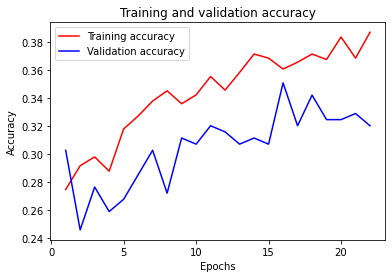

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

preds = model.predict(test_X) # see how the model did!
print(preds.shape)
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(test_y[:1])

results = []

for i in range(len(preds)):
    num = (np.argmax(preds[i])) +1
    results.append(num)
    
#max_value = max(number_list) Return the max value of the list.
#max_index = number_list.index(max(number_list)) 

print(preds[0])
print(results)

print("Accuracy:",metrics.accuracy_score(test_y, results))

# actual is left, predicted is top
# names can be found by inspecting Y
#matrix = confusion_matrix(dummy_y_test.argmax(axis=1), preds.argmax(axis=1))

# more detail on how well things were predicted
#print(classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))

(320, 10)
[0.4862251  0.01480913 0.12275425 0.01562496 0.08204338 0.04084797
 0.02931254 0.11163895 0.08786239 0.0088814 ]
2459    1.0
Name: Q16, dtype: float64
[0.4862251  0.01480913 0.12275425 0.01562496 0.08204338 0.04084797
 0.02931254 0.11163895 0.08786239 0.0088814 ]
[1, 1, 3, 3, 3, 7, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 7, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 5, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 7, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1,